### Loading data


In [290]:
import numpy as np
import pandas as pd
data = pd.read_csv('Data.csv')
# Loaded the dataset into a pandas DataFrame

### Normalize the data


In [291]:
data = pd.read_csv('Data.csv')
X_mean , Y_mean = data.mean()
X_std , Y_std = data.std()
data['X']= (data['X'] - X_mean)/X_std
shuffled_data = data.sample(frac=1)
print(shuffled_data)


            X         Y
583  0.908872  2.303653
602  0.015581  0.652552
100  0.988507  1.895366
980  0.711517  3.410694
402  0.559173 -0.127870
..        ...       ...
264  1.102765  1.184421
451  1.310507  2.791363
752 -0.271796  1.566698
39  -0.805001  0.685035
495  0.510700  1.030711

[1000 rows x 2 columns]


### TEST TRAIN SPLIT

In [292]:
split_ratio = 0.8
row_no, col_no = shuffled_data.shape
train_length = int(row_no*split_ratio)

Train = shuffled_data[:train_length]
Test = shuffled_data[train_length:]

X_Train = Train['X'].values
X_Test = Test['X'].values
Y_Test = Test['Y'].values
Y_Train = Train['Y'].values

## Poly Reg

In [293]:
import matplotlib.pyplot as plt
def poly_transform(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.insert(transform_data, i, transformed_feature, axis=1)
    return transform_data

[1.7288036572077423, 1.7149514171407196, 1.0630510408350922, 1.0761595409399796, 1.079538229433316, 1.0637405886900273, 1.055004705075623, 1.0732984227283788, 4.365810135581183e+205]


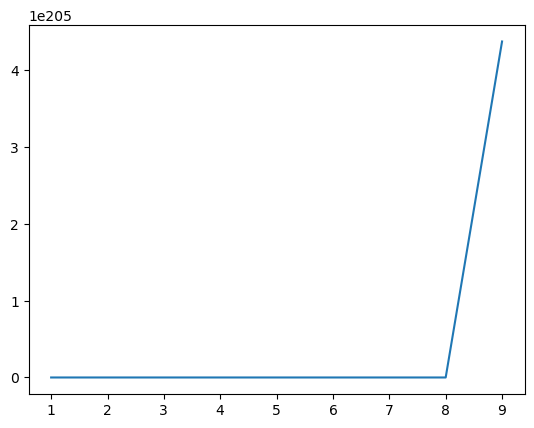

In [294]:
import numpy as np
import matplotlib.pyplot as plt
def bgd_regressor(train, test, learning_rate=0.0022, max_iters=500):
    X = train
    Y = test
    W = np.zeros(train.shape[1])
    n = len(train)
    for _ in range(max_iters):
        Y_pred = np.dot(X, W)
        gradient = np.dot(X.T, Y_pred - Y)
        change = (learning_rate / len(X)) * gradient
        W -= change
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output = []
for i in degrees:
    X_Train_poly = poly_transform(X_Train, i)
    X_Test_poly = poly_transform(X_Test, i)
    W = bgd_regressor(X_Train_poly, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly, W)
    mse = mean_squared_error(Y_Test, Y_Test_pred)
    output.append(mse)

print(output)
plt.plot(degrees, output)
plt.show()

## Task 2
 

### Loading data


In [295]:
import numpy as np
import pandas as pd
data = pd.read_csv('data2.csv')

### Normalize the data

In [296]:
data = pd.read_csv('data2.csv')
Height_mean , Width_mean , Weight_mean = data.mean()
Height_std , Width_std , Weight_std = data.std()
data['Height'] = (data['Height'] - Height_mean)/ Height_std
data['Width'] = (data['Width'] - Width_mean)/ Width_std
data = np.array(data)
np.random.shuffle(data)
print(data)

[[ 1.25994977e+00  2.35563859e-01  5.00000000e+02]
 [ 6.90028704e-01  1.59503399e+00  8.50000000e+02]
 [-6.05662147e-01 -3.51455792e-01  1.45000000e+02]
 [-9.07327422e-01 -9.76083614e-01  8.50000000e+01]
 [-7.78122295e-01 -8.11058486e-01  8.00000000e+01]
 [-1.52605620e+00 -1.86764640e+00  1.34000000e+01]
 [-6.67488364e-01 -5.29412437e-01  1.30000000e+02]
 [-7.07990368e-01 -1.96259691e-02  3.00000000e+02]
 [-8.75481088e-01 -4.69500366e-01  1.50000000e+02]
 [ 8.47603899e-01  2.20934032e+00  1.00000000e+03]
 [-1.04506628e-02  1.04028381e+00  9.50000000e+02]
 [ 1.28384035e+00  7.77145247e-01  6.50000000e+02]
 [-9.40210429e-02  2.11243118e-01  2.72000000e+02]
 [ 1.19920997e-01  5.56123095e-01  3.90000000e+02]
 [-6.28992795e-01 -4.10774674e-01  1.70000000e+02]
 [ 9.91567201e-02 -5.97391875e-01  1.70000000e+02]
 [ 1.43658610e+00  6.83362096e-01  5.75000000e+02]
 [ 4.29518692e-01  1.81664933e+00  1.65000000e+03]
 [-1.60024766e+00 -1.78519316e+00  5.90000000e+00]
 [-3.67269589e-01 -1.72194132e-

## Split Data

In [297]:
n, m = data.shape
split_ratio = 0.8
Train_2 = data[:int(0.8*n),:]
Test_2 = data[int(0.8*n):,:]
X_Train = Train_2[:,:-1]
Y_Train = Train_2[:,-1]
X_Test = Test_2[:,:-1]
Y_Test = Test_2[:,-1]

In [298]:
import matplotlib.pyplot as plt
def poly_transform_2(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.concatenate((transform_data,transformed_feature), axis=1)
    return transform_data

## Regression with 0.5

[14546.783463201831, 11109.83302822942, 14484.267296760307, 14075.641532471658, 10318.14577778777, 12847.12236015009, nan, nan, nan]


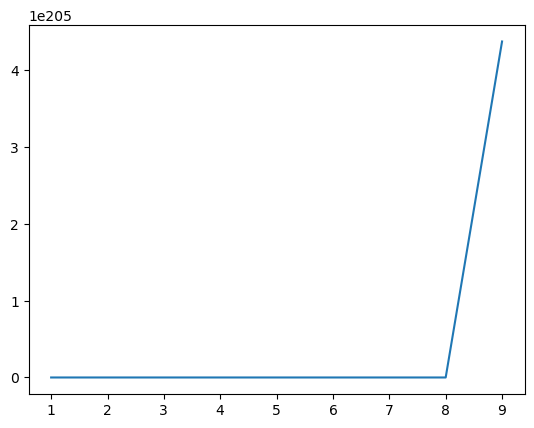

In [299]:
def half_reg(X:np.ndarray, Y:np.ndarray,max_iter = 500 ,penalty = 0.07, learning_rate = 0.000018):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        Y_pred = np.dot(X,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
        if flag == False:
            grad = 1/n*np.dot(X.T, Y_pred-Y)
        else:
            grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5
        W -= learning_rate*grad
        learning_rate /=1.000005
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


degrees = [1,2,3,4,5,6,7,8,9]
output_bch_half = []
for i in degrees:
    X_Train_poly_bch_half = poly_transform_2(X_Train, i)
    X_Test_poly_bch_half = poly_transform_2(X_Test, i)
    W_bch_half = bgd_regressor(X_Train_poly_bch_half, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_half,W_bch_half)
    mse_bch_half = mean_squared_error(Y_Test, Y_Test_pred)
    output_bch_half.append(mse_bch_half)

print(output_bch_half)
plt.plot(degrees, output)
plt.show()

## Regression with 1 degree

[353.84827241  46.2501614  347.43068578 -22.85784785  74.13115172
   9.80217864 -34.31339053]
10825.223220699283
[14546.783463201831, 11109.83302822942, 14484.267296760307, 14075.641532471658, 10318.14577778777, 12847.12236015009, nan, nan, nan]


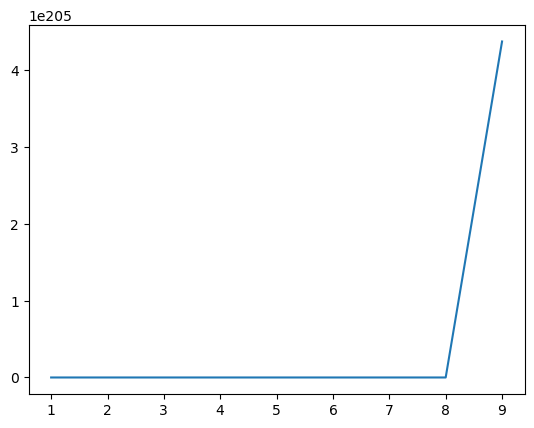

In [304]:
def one_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 0.5*l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed_Train = poly_transform_2(X_Train,3)
X_Transformed_Test  = poly_transform_2(X_Test,3)
W_one = one_deg(X_transformed_Train, Y_Train)
W_one
print(W_one)
Y_pred_one_deg = np.dot(X_Transformed_Test, W_one)

mse_one = mean_squared_error_one_deg(Y_Test, Y_pred_one_deg)
print(mse_one)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_one = []
for i in degrees:
    X_Train_poly_bch_one = poly_transform_2(X_Train, i)
    X_Test_poly_bch_one = poly_transform_2(X_Test, i)
    W_bch_one = bgd_regressor(X_Train_poly_bch_one, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_one,W_bch_one)
    mse_bch_one = mean_squared_error(Y_Test, Y_Test_pred)
    output_bch_one.append(mse_bch_one)

print(output_bch_one)
plt.plot(degrees, output)
plt.show()

## Regression with 2 degree

[129.93617586  26.81997166  66.89138451  60.33229623  89.02469385
  21.79903225  56.31777079]
19488.851292705593
[14546.783463201831, 11109.83302822942, 14484.267296760307, 14075.641532471658, 10318.14577778777, 12847.12236015009, nan, nan, nan]


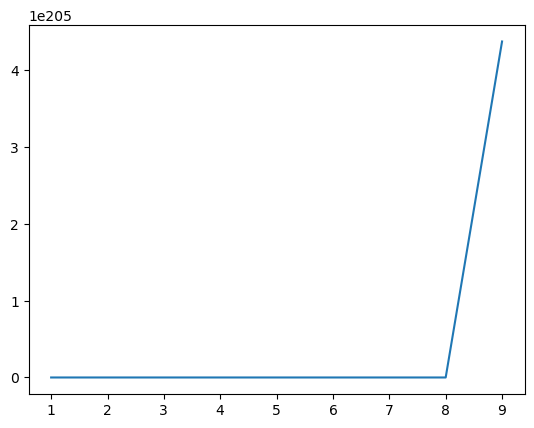

In [305]:
def two_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.002, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + l1_penalty*(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_two_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X_transformed_two = poly_transform_2(X_Train,3)
X_transformed_Test_two = poly_transform_2(X_Test,3)
W_two = two_deg(X_transformed_two, Y_Train)
print(W_two)
Y_pred_two_deg = np.dot(X_transformed_Test_two, W_two)
mse_two = mean_squared_error_two_deg(Y_Test, Y_pred_two_deg)
print(mse_two)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_two = []
for i in degrees:
    X_Train_poly_bch_two = poly_transform_2(X_Train, i)
    X_Test_poly_bch_two = poly_transform_2(X_Test, i)
    W_bch_two = bgd_regressor(X_Train_poly_bch_two, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_two,W_bch_two)
    mse_bch_two = mean_squared_error(Y_Test, Y_Test_pred)
    output_bch_two.append(mse_bch_two)

print(output_bch_two)
plt.plot(degrees, output)
plt.show()

## Regression with 4 degree

[123.48809889  25.56940756  62.72061652  60.34348826  88.49243067
  22.78316187  56.76030209]
21189.430008674783
[14546.783463201831, 11109.83302822942, 14484.267296760307, 14075.641532471658, 10318.14577778777, 12847.12236015009, nan, nan, nan]


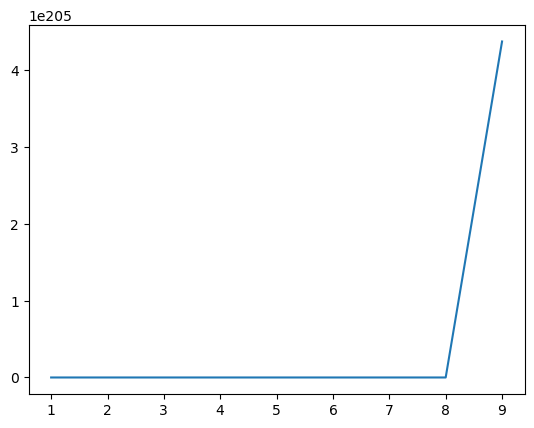

In [306]:
def four_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.005, l1_penalty = 0.5, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_four_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X_transformed_four = poly_transform_2(X_Train,3)
X_transformed_Test_four = poly_transform_2(X_Test,3)
W_four = four_deg(X_transformed_four, Y_Train)
print(W_four)
Y_pred_four_deg = np.dot(X_transformed_Test_four, W_four)
mse_four = mean_squared_error_four_deg(Y_Test, Y_pred_four_deg)
print(mse_four)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_four = []
for i in degrees:
    X_Train_poly_bch_four = poly_transform_2(X_Train, i)
    X_Test_poly_bch_four = poly_transform_2(X_Test, i)
    W_bch_four = bgd_regressor(X_Train_poly_bch_four, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_four,W_bch_four)
    mse_bch_four = mean_squared_error(Y_Test, Y_Test_pred)
    output_bch_four.append(mse_bch_four)

print(output_bch_four)
plt.plot(degrees, output)
plt.show()

## 0.5 stoc

In [307]:
def half_reg_stc(X:np.ndarray, Y:np.ndarray,max_iter = 500 ,penalty = 0.07, learning_rate = 1e-85):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        idx = np.random.randint(0, n-1)
        X_temp = X[idx]
        Y_temp = Y[idx]
        Y_pred = np.dot(X_temp,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
                break

        if flag == False:
            print(W)
            print("hey")
            grad = np.dot(X_temp.T, Y_pred-Y_temp)
        else:
            print(W)
            print("sdifh")
            grad = np.dot(X_temp.T, Y_pred-Y_temp) + penalty*0.5*W**-0.5
        W -= learning_rate*grad
        learning_rate /=1.00005
    return W

def mean_squared_error_stc_half(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_trans_Train_stc_half = poly_transform_2(X_Train,3)
X_trans_Test_stc_half = poly_transform_2(X_Test,3)
W_stc_half = half_reg_stc(X_trans_Train_stc_half,Y_Train)
y_pred_stc_half = np.dot(X_trans_Test_stc_half, W_stc_half)
mse_stc_half = mean_squared_error_stc_half(Y_Test, y_pred_stc_half)
print(mse_stc_half)

[0. 0. 0. 0. 0. 0. 0.]
hey
[ 4.00000000e-84 -4.50168927e-84 -5.10020311e-84  5.06630157e-84
  6.50301794e-84 -5.70172885e-84 -8.29167808e-84]
sdifh
[-1.74991250e-45             nan             nan -1.55489409e-45
 -1.37242574e-45             nan             nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan nan nan nan nan nan]
sdifh
[nan nan na

/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/2727076931.py:22: RuntimeWarning: invalid value encountered in power
  grad = np.dot(X_temp.T, Y_pred-Y_temp) + penalty*0.5*W**-0.5


## 1 stoc

In [308]:
def one_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 0.5*l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed_Train_stoic = poly_transform_2(X_Train,3)
X_Transformed_Test_stoic  = poly_transform_2(X_Test,3)
W_one_stoic = one_deg_stoic(X_transformed_Train_stoic, Y_Train)
print(W_one_stoic)
Y_pred_one_deg_stoic = np.dot(X_Transformed_Test_stoic, W_one_stoic)
mse_one_stoic = mean_squared_error_one_deg(Y_Test, Y_pred_one_deg_stoic)
print(mse_one_stoic)

[126.23249309  22.60900624  55.12295884  75.13833098 108.31367057
  23.73936324  65.80886999]
19397.578641732292


## 2 stoc

In [309]:
def two_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + l1_penalty*W
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_two_deg_stoic(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed_Train_stoic_two = poly_transform_2(X_Train,3)
X_Transformed_Test_stoic_two  = poly_transform_2(X_Test,3)
W_two_stoic = two_deg_stoic(X_transformed_Train_stoic_two, Y_Train)
print(W_two_stoic)
Y_pred_one_deg_stoic_two = np.dot(X_Transformed_Test_stoic_two, W_two_stoic)
mse_two_stoic = mean_squared_error_two_deg_stoic(Y_Test, Y_pred_one_deg_stoic_two)
print(mse_two_stoic)

[82.72978777 18.72098729 39.62676193 58.60837669 83.37833365 30.44798772
 59.90353139]
34556.603710476746
